In [3]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

2023-02-17 18:09:26.385618: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-17 18:09:26.490635: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-02-17 18:09:26.493175: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-17 18:09:26.493185: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore 

In [2]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    # plt.xlim(-0.5, len(np.unique(y))-0.5)
    # plt.ylim(len(np.unique(y))-0.5, -0.5)
    return ax

In [3]:
# hand_ds = tf.data.experimental.make_csv_dataset(
#     'data.csv',
#     batch_size=5, # Artificially small to make examples easier to show.
#     label_name='label',
#     num_epochs=1,
#     ignore_errors=True,)
data_x = np.loadtxt("data_manual.csv", delimiter=",", dtype=float, usecols=list(range(1, (21 * 2) + 1)))
data_y = np.loadtxt("data_manual.csv", delimiter=",", dtype=float, usecols=(0))
data_y=data_y.tolist()
for i,d in enumerate(data_y):
    ar=[0]*3
    # print(int(d))
    ar[int(d)]=1
    data_y[i]=ar.copy()
data_y=np.array(data_y)
train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, train_size=0.75, random_state=69)

print(train_x.shape,test_x.shape)

(1329, 42) (443, 42)


In [4]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Input((42,)),
    tf.keras.layers.Dense(16,activation='relu'),
    # tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(8,activation='relu'),
    # tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(3,activation='softmax')
])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss=tf.keras.losses.BinaryCrossentropy())
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                688       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 3)                 27        
                                                                 
Total params: 851
Trainable params: 851
Non-trainable params: 0
_________________________________________________________________


2023-02-17 10:23:45.158831: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-02-17 10:23:45.158886: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (dtech-pc): /proc/driver/nvidia/version does not exist
2023-02-17 10:23:45.160283: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

history = model.fit(x=train_x,y=train_y,batch_size=5,shuffle=True,epochs=50,callbacks=[callback])

Epoch 1/50
266/266 [==============================] - 1s 2ms/step - loss: 0.5842
Epoch 2/50
266/266 [==============================] - 1s 3ms/step - loss: 0.3842
Epoch 3/50
266/266 [==============================] - 1s 3ms/step - loss: 0.2132
Epoch 4/50
266/266 [==============================] - 1s 2ms/step - loss: 0.1173
Epoch 5/50
266/266 [==============================] - 0s 2ms/step - loss: 0.0689
Epoch 6/50
266/266 [==============================] - 1s 2ms/step - loss: 0.0464
Epoch 7/50
266/266 [==============================] - 1s 2ms/step - loss: 0.0343
Epoch 8/50
266/266 [==============================] - 1s 2ms/step - loss: 0.0287
Epoch 9/50
266/266 [==============================] - 0s 2ms/step - loss: 0.0236
Epoch 10/50
266/266 [==============================] - 0s 2ms/step - loss: 0.0223
Epoch 11/50
266/266 [==============================] - 0s 2ms/step - loss: 0.0194
Epoch 12/50
266/266 [==============================] - 0s 2ms/step - loss: 0.0191
Epoch 13/50
266/266 [====

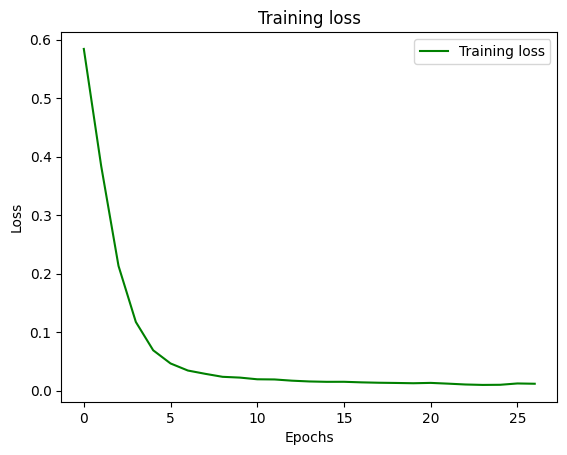

In [6]:
plt.plot(history.epoch, history.history["loss"], 'g', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [7]:
model.save("models/v1.h5")

14/14 [==============================] - 0s 2ms/step
Accuracy = 0.9932279909706546
Normalized confusion matrix
[[0.99375    0.00625    0.        ]
 [0.01459854 0.98540146 0.        ]
 [0.         0.         1.        ]]


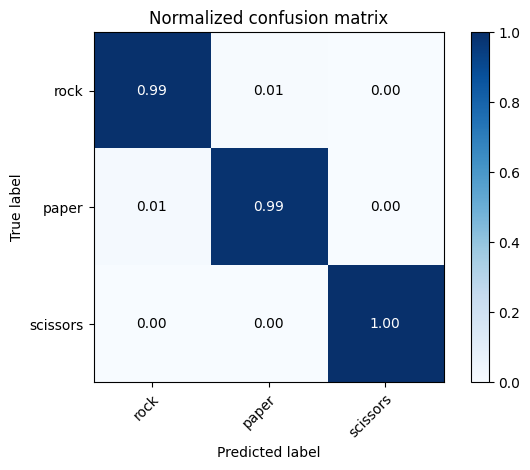

In [8]:
from sklearn import metrics

prediction=model.predict(test_x)
actual=[]
predicted=[]
c=0
for i,p in enumerate(prediction):
    predicted.append(np.argmax(p))
    actual.append(np.argmax(test_y[i]))

    if(predicted[i]==actual[i]):
        c+=1
print(f'Accuracy = {c/len(actual)}')


# print(actual,predicted)
class_names = np.array(['rock','paper','scissors'])

plot_confusion_matrix(actual, predicted, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()


In [6]:
model= tf.keras.models.load_model("models/v1.h5")
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('models/v1.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpl6uo5sto/assets


INFO:tensorflow:Assets written to: /tmp/tmpl6uo5sto/assets
2023-02-17 19:20:08.803591: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:362] Ignored output_format.
2023-02-17 19:20:08.803696: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:365] Ignored drop_control_dependency.
2023-02-17 19:20:08.805675: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /tmp/tmpl6uo5sto
2023-02-17 19:20:08.807578: I tensorflow/cc/saved_model/reader.cc:89] Reading meta graph with tags { serve }
2023-02-17 19:20:08.807639: I tensorflow/cc/saved_model/reader.cc:130] Reading SavedModel debug info (if present) from: /tmp/tmpl6uo5sto
2023-02-17 19:20:08.816574: I tensorflow/cc/saved_model/loader.cc:229] Restoring SavedModel bundle.
2023-02-17 19:20:08.898602: I tensorflow/cc/saved_model/loader.cc:213] Running initialization op on SavedModel bundle at path: /tmp/tmpl6uo5sto
2023-02-17 19:20:08.920021: I tensorflow/cc/saved_model/loader.cc:305] SavedModel